<a href="https://colab.research.google.com/github/attar-tabassum/Detecting-Student-stress-level/blob/main/Decoding_student_stress_pattern_using_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lightgbm

In [ ]:
pip install --upgrade lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/StressLevelDataset.csv")
df

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


Descriptive Statistics
1) How many students are in the dataset?
2) What is the average anxiety level of students in the dataset?
3) How many students have reported a history of mental health issues?

In [ ]:
# 1
num_students = len(df)

# 2
average_anxiety_level = df['anxiety_level'].mean()

# 3
students_with_mental_health_history = df[df['mental_health_history'] == 1]
num_students_with_mental_health_history = len(students_with_mental_health_history)

print("1) Number of students in the dataset:", num_students)
print("2) Average anxiety level of students:", average_anxiety_level)
print("3) Number of students with a history of mental health issues:", num_students_with_mental_health_history)


1) Number of students in the dataset: 1100
2) Average anxiety level of students: 11.063636363636364
3) Number of students with a history of mental health issues: 542


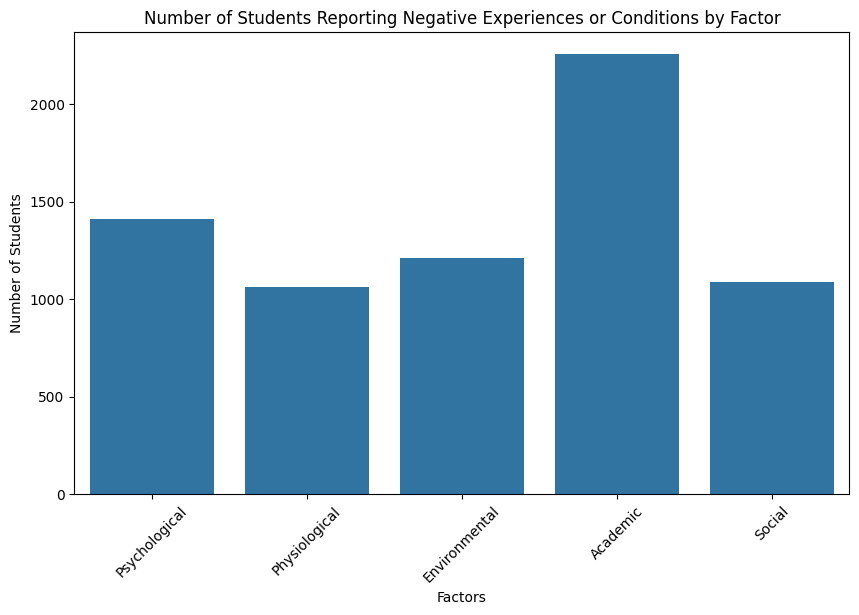

In [ ]:
# Define the relevant columns
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Calculate the number of students with negative experiences or conditions for each factor
num_students_with_negative_psychological = df[psychological_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_physiological = df[physiological_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_environmental = df[environmental_factors].apply(lambda x: x.gt(3).sum(), axis=1)
num_students_with_negative_academic = df[academic_factors].apply(lambda x: x.lt(3).sum(), axis=1)
num_students_with_negative_social = df[social_factors].apply(lambda x: x.gt(3).sum(), axis=1)

# Create a bar chart for the number of students with various negative experiences or conditions
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [
    num_students_with_negative_psychological.sum(),
    num_students_with_negative_physiological.sum(),
    num_students_with_negative_environmental.sum(),
    num_students_with_negative_academic.sum(),
    num_students_with_negative_social.sum()
]

plt.figure(figsize=(10, 6))
sns.barplot(x=factors, y=negative_experiences)
plt.title("Number of Students Reporting Negative Experiences or Conditions by Factor")
plt.xlabel("Factors")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

Psychological Factors 1) How many students have a self-esteem level below the average? 2) What percentage of students have reported experiencing depression?

In [ ]:
# 1
average_self_esteem = df['self_esteem'].mean()
students_below_average_self_esteem = df[df['self_esteem'] < average_self_esteem]
num_students_below_average_self_esteem = len(students_below_average_self_esteem)


# 2
percentage_students_experiencing_depression = (df['depression'].sum() / num_students) * 100

print("1) Number of students with self-esteem below the average:", num_students_below_average_self_esteem)
print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

1) Number of students with self-esteem below the average: 507
2) Percentage of students experiencing depression: 1255.55%


NOTE in order to have the percentage of students experience depression in a logical scale which is more understandable, we can set a threshold and create a new binary column

In [ ]:
threshold = 10
df['depression_binary'] = (df['depression'] > threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)


percentage_students_experiencing_depression = (df['depression_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing depression: {percentage_students_experiencing_depression:.2f}%")

2) Percentage of students experiencing depression: 56.36%


In [ ]:
Physiological Factors 1) How many students experience headaches frequently? 2) What is the average blood pressure reading among the students? 3) How many students rate their sleep quality as poor?

Object `poor` not found.


In [ ]:
# 1
students_with_frequent_headaches = df[df['headache'] == 1]
num_students_with_frequent_headaches = len(students_with_frequent_headaches)

# 2
average_blood_pressure = df['blood_pressure'].mean()

# 3
students_with_poor_sleep_quality = df[df['sleep_quality'] < 3]
num_students_with_poor_sleep_quality = len(students_with_poor_sleep_quality)

print("1) Number of students experiencing frequent headaches:", num_students_with_frequent_headaches)
print("2) Average blood pressure reading among the students:", average_blood_pressure)
print("3) Number of students with poor sleep quality:", num_students_with_poor_sleep_quality)

1) Number of students experiencing frequent headaches: 331
2) Average blood pressure reading among the students: 2.1818181818181817
3) Number of students with poor sleep quality: 550


Environmental Factors 1) How many students live in conditions with high noise levels? 2) What percentage of students feel unsafe in their living conditions? 3) How many students have reported not having their basic needs met?

In [ ]:
# 1
students_in_high_noise_conditions = df[df['noise_level'] > 3]
num_students_in_high_noise_conditions = len(students_in_high_noise_conditions)

# 2
percentage_students_feeling_unsafe = (df['safety'].sum() / num_students) * 100

# 3
students_without_basic_needs = df[df['basic_needs'] == 0]
num_students_without_basic_needs = len(students_without_basic_needs)

print("1) Number of students living in high noise conditions:", num_students_in_high_noise_conditions)
print("2) Percentage of students feeling unsafe in their living conditions:", percentage_students_feeling_unsafe)
print("3) Number of students without their basic needs met:", num_students_without_basic_needs)

1) Number of students living in high noise conditions: 274
2) Percentage of students feeling unsafe in their living conditions: 273.72727272727275
3) Number of students without their basic needs met: 40


NOTE in order to have the Percentage of students feeling unsafe in their living conditions in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [ ]:
# Create a binary column for safety (1 indicates feeling unsafe, 0 indicates feeling safe)
threshold_for_safety = 2
df['feeling_unsafe'] = (df['safety'] <= threshold_for_safety).astype(int)


percentage_students_feeling_unsafe = (df['feeling_unsafe'].sum() / num_students) * 100

print(f"2) Percentage of students feeling unsafe in their living conditions: {percentage_students_feeling_unsafe:.2f}%")

2) Percentage of students feeling unsafe in their living conditions: 51.36%


Academic Factors 1) How many students rate their academic performance as below average? 2) What is the average study load reported by students? 3) How many students have concerns about their future careers

In [ ]:
# 1
students_below_average_academic_performance = df[df['academic_performance'] < 3]
num_students_below_average_academic_performance = len(students_below_average_academic_performance)

# 2
average_study_load = df['study_load'].mean()

# 3
students_with_future_career_concerns = df[df['future_career_concerns'] == 1]
num_students_with_future_career_concerns = len(students_with_future_career_concerns)

print("1) Number of students with below-average academic performance:", num_students_below_average_academic_performance)
print("2) Average study load reported by students:", average_study_load)
print("3) Number of students with concerns about their future careers:", num_students_with_future_career_concerns)

1) Number of students with below-average academic performance: 561
2) Average study load reported by students: 2.6218181818181816
3) Number of students with concerns about their future careers: 327


Social Factors 1) How many students feel they have strong social support? 2) What percentage of students have experienced bullying? 3) How many students participate in extracurricular activities?

In [ ]:
# 1
students_with_strong_social_support = df[df['social_support'] > 3]
num_students_with_strong_social_support = len(students_with_strong_social_support)

# 2
percentage_students_experiencing_bullying = (df['bullying'].sum() / num_students) * 100

# 3
students_participating_in_extracurricular = df[df['extracurricular_activities'] == 1]
num_students_participating_in_extracurricular = len(students_participating_in_extracurricular)

print("1) Number of students with strong social support:", num_students_with_strong_social_support)
print("2) Percentage of students experiencing bullying:", percentage_students_experiencing_bullying)
print("3) Number of students participating in extracurricular activities:", num_students_participating_in_extracurricular)

1) Number of students with strong social support: 0
2) Percentage of students experiencing bullying: 261.72727272727275
3) Number of students participating in extracurricular activities: 184


NOTE in order to have the Percentage of students experiencing bullying in a logical scale which is more understandable, we can set a threshold and create a new binary column (Like earlier we've created a column for depression)

In [ ]:
bullying_threshold = 3
df['bullying_binary'] = (df['bullying'] > bullying_threshold).astype(int)

# Ensure 'num_students' is defined. If not, define it.
if 'num_students' not in locals():
    num_students = len(df)

# Compute the percentage using the new binary column
percentage_students_experiencing_bullying = (df['bullying_binary'].sum() / num_students) * 100

print(f"2) Percentage of students experiencing bullying: {percentage_students_experiencing_bullying:.2f}%")

2) Percentage of students experiencing bullying: 32.73%


Comparative Analysis 1) Is there a correlation between anxiety level and academic performance? 2) Do students with poor sleep quality also report higher levels of depression? 3) Are students who experience bullying more likely to have a history of mental health issues?

In [ ]:
# 1
correlation_anxiety_academic = df['anxiety_level'].corr(df['academic_performance'])

# 2
correlation_sleep_depression = df['sleep_quality'].corr(df['depression'])

# 3
students_with_bullying_history = df[df['bullying'] == 1]
students_with_bullying_history_and_mental_health_history = students_with_bullying_history[
    students_with_bullying_history['mental_health_history'] == 1]
percentage_students_with_bullying_and_mental_health_history = (
    len(students_with_bullying_history_and_mental_health_history) / len(students_with_bullying_history)) * 100

print("1) Correlation between anxiety level and academic performance:", correlation_anxiety_academic)
print("2) Correlation between sleep quality and depression:", correlation_sleep_depression)
print("3) Percentage of students with bullying history and mental health history:", percentage_students_with_bullying_and_mental_health_history)

1) Correlation between anxiety level and academic performance: -0.6496011296145091
2) Correlation between sleep quality and depression: -0.6931609071393333
3) Percentage of students with bullying history and mental health history: 4.179104477611941


General Exploration 1) Which factor (Psychological, Physiological, Environmental, Academic, Social) has the highest number of students reporting negative experiences or conditions? 2) Are there any noticeable trends or patterns when comparing different factors? 3) Which specific feature within each factor has the most significant impact on student stress, based on the dataset?

In [ ]:
# 1

factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']
negative_experiences = [num_students_below_average_self_esteem,
                        num_students_with_frequent_headaches,
                        num_students_in_high_noise_conditions,
                        num_students_without_basic_needs,
                        len(students_with_bullying_history)]
factor_with_most_negatives = factors[negative_experiences.index(max(negative_experiences))]

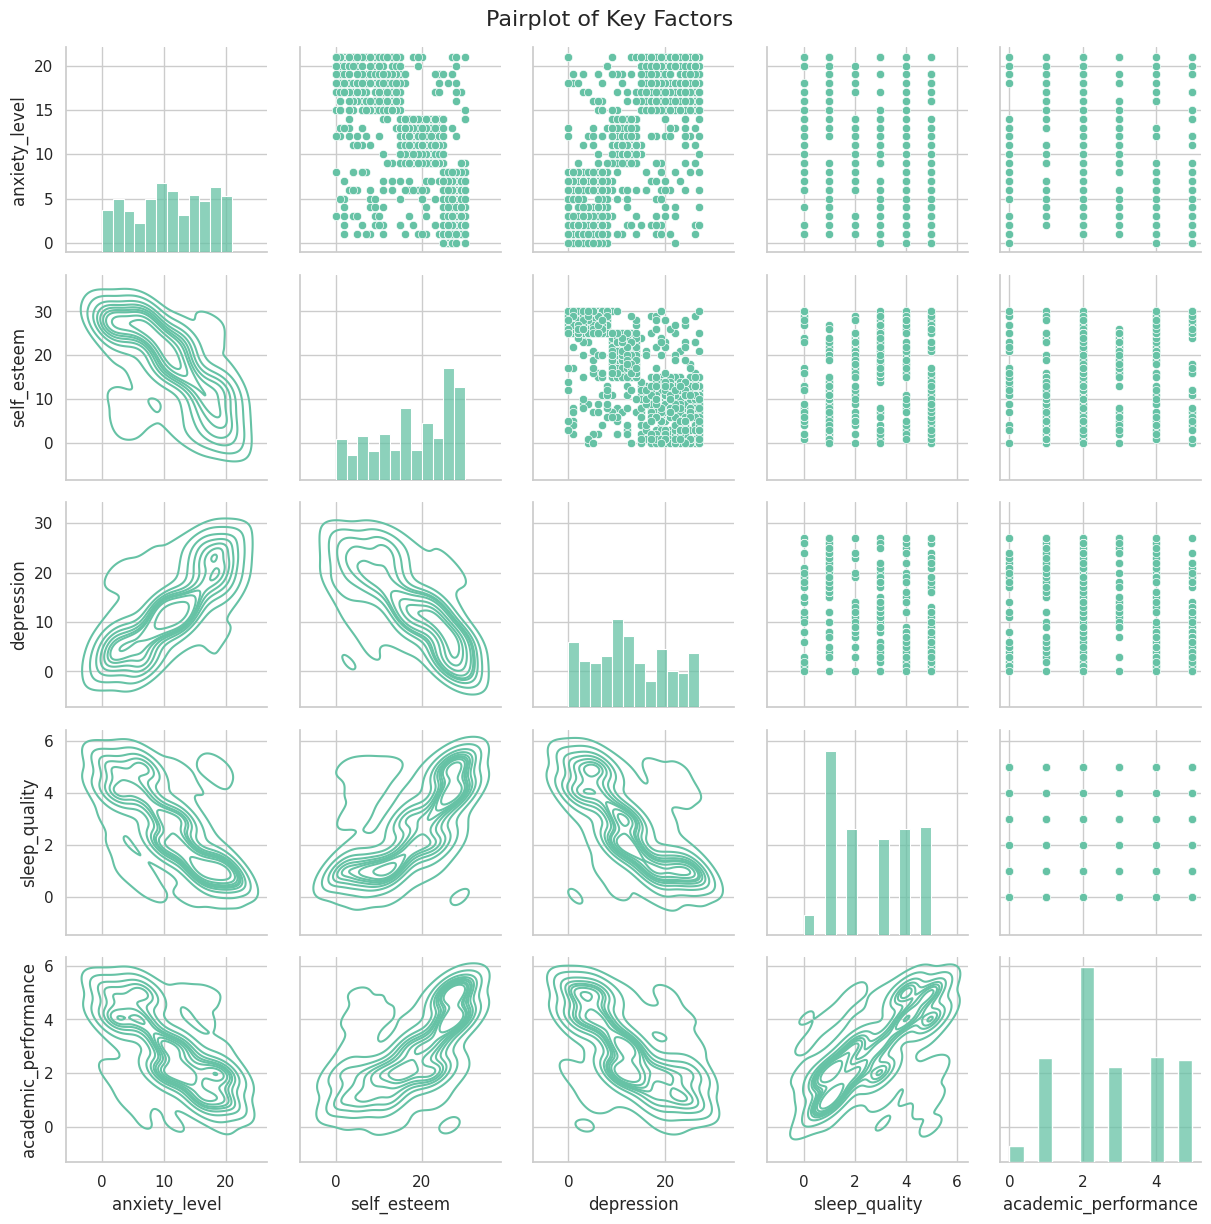

Factor: Psychological
- Feature: anxiety_level, Importance: 0.23645058734183727
- Feature: self_esteem, Importance: 0.5771201487026225
- Feature: mental_health_history, Importance: 0.021410636260751514
- Feature: depression, Importance: 0.16501862769478876

Factor: Physiological
- Feature: headache, Importance: 0.40143909733181
- Feature: blood_pressure, Importance: 0.05451630762004436
- Feature: sleep_quality, Importance: 0.47179146529678895
- Feature: breathing_problem, Importance: 0.07225312975135678

Factor: Environmental
- Feature: noise_level, Importance: 0.14895753413741236
- Feature: living_conditions, Importance: 0.12172186774065104
- Feature: safety, Importance: 0.34793248856750564
- Feature: basic_needs, Importance: 0.381388109554431

Factor: Academic
- Feature: academic_performance, Importance: 0.3956898008112834
- Feature: study_load, Importance: 0.10317851905664635
- Feature: teacher_student_relationship, Importance: 0.2723154505886847
- Feature: future_career_concerns, I

In [ ]:
# 2&3

# Set a custom style for the plot
sns.set(style="whitegrid", palette="Set2")


factors_to_plot = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']]

g = sns.PairGrid(factors_to_plot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="C0")
g.map_diag(sns.histplot, kde_kws={'color': 'C0'})


plt.subplots_adjust(top=0.95)
g.fig.suptitle("Pairplot of Key Factors", size=16)
# Show the plot
plt.show()



# use perform feature importance analysis To determine which specific feature within each factor has the most significant impact.

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Define factors
factors = ['Psychological', 'Physiological', 'Environmental', 'Academic', 'Social']

# Define feature sets for each factor

psychological_features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_features = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_features = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_features = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_features = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

# Initialize a Random Forest Regressor
model = RandomForestRegressor()


feature_importance = {}

# Loop through each factor and analyze feature importance

for factor, features in zip(factors, [psychological_features, physiological_features, environmental_features, academic_features, social_features]):
    X = df[features]
    y = df['stress_level']

    model.fit(X, y)

    # Get feature importances
    importance = model.feature_importances_


    # Store feature importances in the dictionary

    feature_importance[factor] = {feature: importance_value for feature, importance_value in zip(features, importance)}


    # Print the feature importance for each factor

for factor, importance_dict in feature_importance.items():
    print(f"Factor: {factor}")
    for feature, importance_value in importance_dict.items():
        print(f"- Feature: {feature}, Importance: {importance_value}")
    print()

Correlation Heatmap of Key Factors create a heatmap to visualize correlations between key factors. This helps you identify strong positive or negative relationships

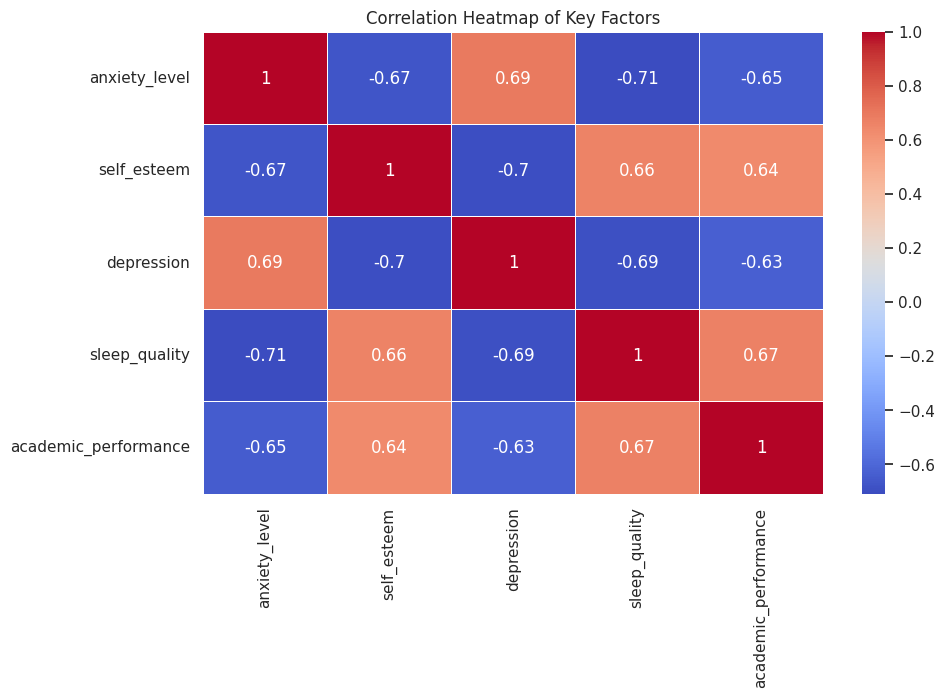

In [ ]:
correlation_matrix = df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Factors")
plt.show()

Box Plots use box plots to identify trends and variations in factors. This is useful for comparing distributions

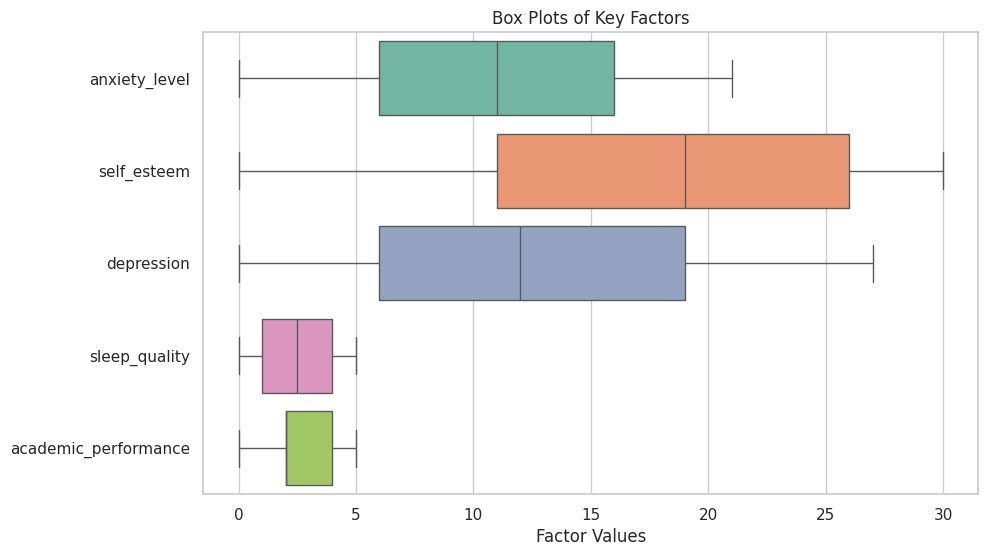

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['anxiety_level', 'self_esteem', 'depression', 'sleep_quality', 'academic_performance']], orient='h')
plt.title("Box Plots of Key Factors")
plt.xlabel("Factor Values")
plt.show()


Determining Specific Feature Impact To visualize feature importance within each factor, create bar charts for each factor's features

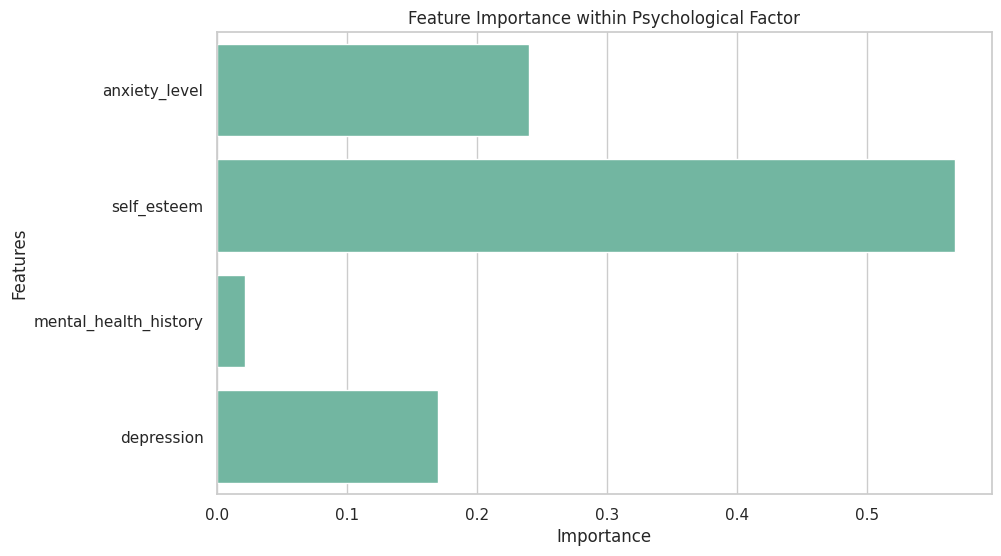

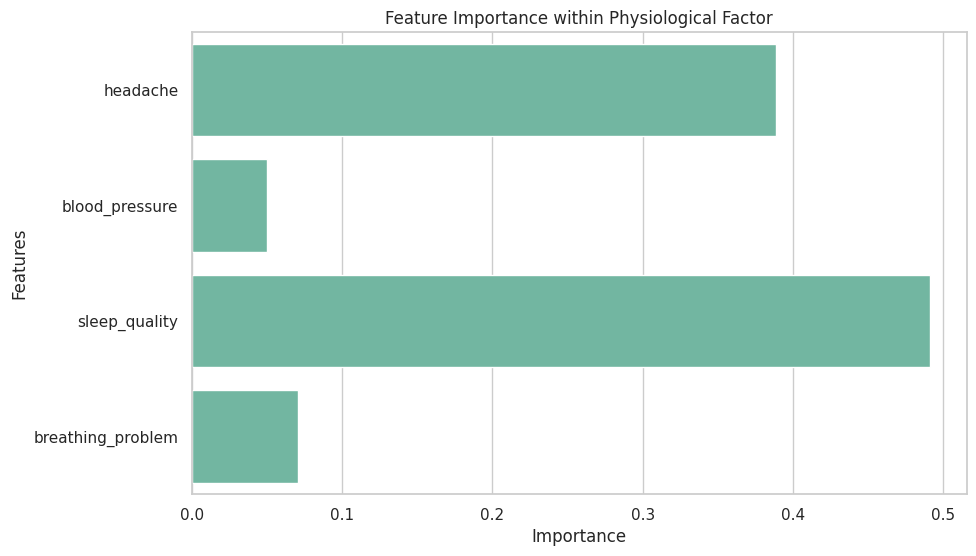

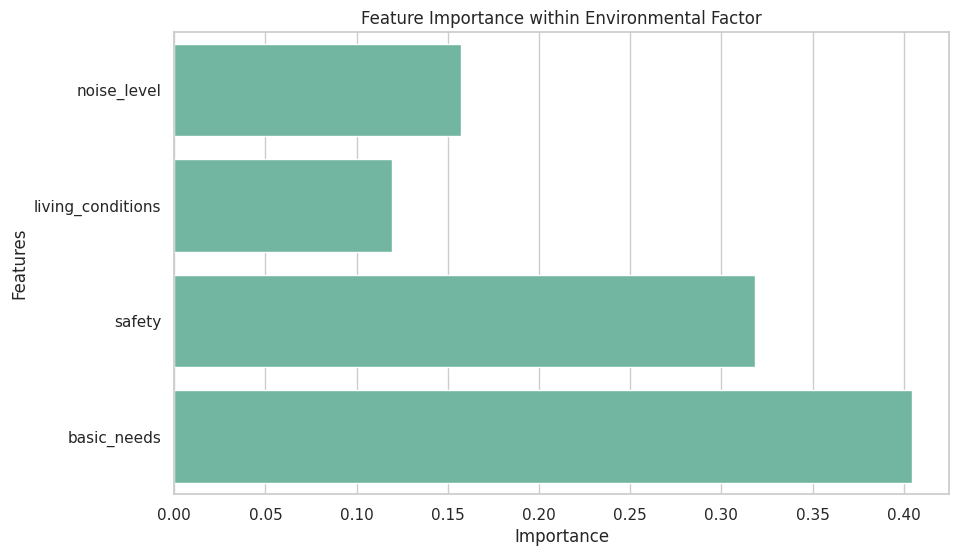

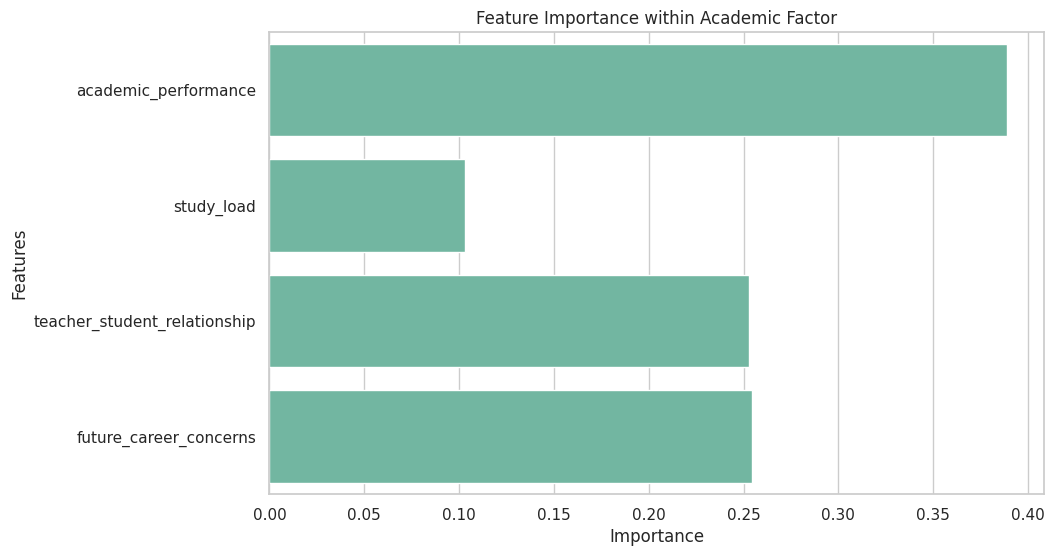

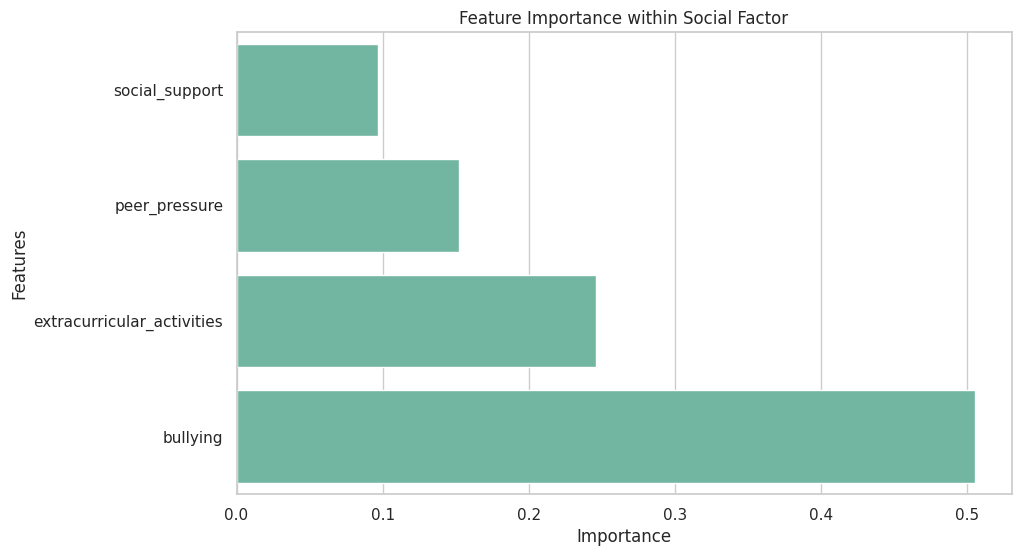

In [ ]:
# Define feature importance for each factor

psychological_feature_importance = feature_importance['Psychological']
physiological_feature_importance = feature_importance['Physiological']
environmental_feature_importance = feature_importance['Environmental']
academic_feature_importance = feature_importance['Academic']
social_feature_importance = feature_importance['Social']



# Create bar charts for feature importance within each factor

def plot_feature_importance(factor_name, importance_dict):
    features = list(importance_dict.keys())
    importance = list(importance_dict.values())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=features, orient='h')
    plt.title(f"Feature Importance within {factor_name} Factor")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importance('Psychological', psychological_feature_importance)
plot_feature_importance('Physiological', physiological_feature_importance)
plot_feature_importance('Environmental', environmental_feature_importance)
plot_feature_importance('Academic', academic_feature_importance)
plot_feature_importance('Social', social_feature_importance)

In [2]:
data=pd.read_csv("/content/StressLevelDataset.csv")
data

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [3]:
label_mapping = {0:0, 1:1, 2:2}
data['stress_level'] = data['stress_level'].map(label_mapping)
#y = data['stress_level']
#print(y)

In [4]:
X = data.drop('stress_level', axis=1)

y = data['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
print(y_test)

469     2
851     1
11      2
788     1
604     0
       ..
1061    0
1073    0
1084    2
578     1
392     1
Name: stress_level, Length: 275, dtype: int64


In [5]:
params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'boosting_type': 'dart',
    'num_leaves': 51,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'min_child_samples': 20,
'min_child_weight': 0.001,
'subsample': 0.8,
    'random_state':42,

    'max_depth': 12  # or another higher value



}
'''

params = {
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'boosting_type': 'dart',
    'num_leaves': 50,
    'learning_rate': 0.01,
    'feature_fraction': 0.8,
    'max_depth': 10,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 1.0,
    'reg_lambda': 1.0,
    'min_split_gain': 0.01,
    'num_boost_round': 500,
    # New parameters
    'colsample_bytree': 0.8,
    'reg_alpha': 1.0,
    'reg_lambda': 1.0,
    'min_split_gain': 0.01,
}'''

"\n\nparams = {\n    'objective': 'multiclass',\n    'num_class': 3,\n    'metric': 'multi_logloss',\n    'boosting_type': 'dart',\n    'num_leaves': 50,\n    'learning_rate': 0.01,\n    'feature_fraction': 0.8,\n    'max_depth': 10,\n    'min_child_samples': 20,\n    'min_child_weight': 0.001,\n    'subsample': 0.8,\n    'colsample_bytree': 0.8,\n    'reg_alpha': 1.0,\n    'reg_lambda': 1.0,\n    'min_split_gain': 0.01,\n    'num_boost_round': 500,\n    # New parameters\n    'colsample_bytree': 0.8,\n    'reg_alpha': 1.0,\n    'reg_lambda': 1.0,\n    'min_split_gain': 0.01,\n}"

In [6]:
params['early_stopping_round'] = 10

In [7]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [8]:
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 825, number of used features: 20
[LightGBM] [Info] Start training from score -1.062894
[LightGBM] [Info] Start training from score -1.102255
[LightGBM] [Info] Start training from score -1.131887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.10/dist-packages/lightgbm/callback.py:292: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [9]:
import numpy as np
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_class = np.argmax(y_pred, axis=1)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)*100
report = classification_report(y_test, y_pred_class)

Light GBM

In [11]:
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

Accuracy: 93.0909

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        88
           1       0.95      0.92      0.93        84
           2       0.91      0.98      0.94       103

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275



In [17]:
import lightgbm as lgb

# Assume 'train_data' and 'params' are defined and the model is trained
# Example:
# train_data = lgb.Dataset(data, label=label)
# params = {'objective': 'binary', 'metric': 'binary_logloss'}

bst = lgb.train(params, train_data, num_boost_round=100)

# Save the model
bst.save_model('your_model.txt')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 825, number of used features: 20
[LightGBM] [Info] Start training from score -1.062894
[LightGBM] [Info] Start training from score -1.102255
[LightGBM] [Info] Start training from score -1.131887
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [18]:
! pip install streamlit -q

In [19]:
!wget -q -O - ipv4.icanhazip.com

35.233.236.95


In [20]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.233.236.95:8501

npx: installed 22 in 5.453s
your url is: https://true-rings-pay.loca.lt
  Stopping...
^C


LIGHT GBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 880, number of used features: 20
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.127433
[LightGBM] [Info] Start training from score -1.082828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

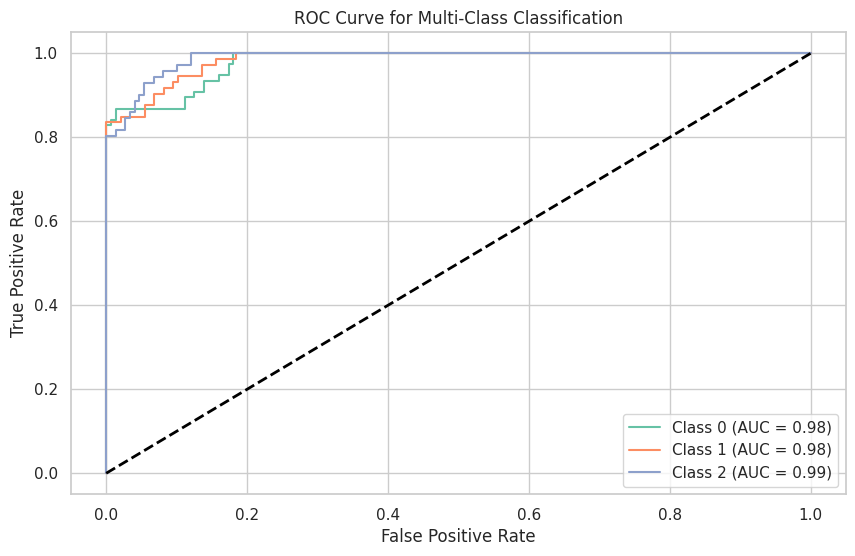

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the problem into binary classification
y_train_binary = label_binarize(y_train, classes=[0, 1, 2])  # Adjust the classes accordingly
y_test_binary = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes accordingly

# Create and train the LightGBM model
model = lgb.LGBMClassifier(objective='multiclass', num_class=3, random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_probas = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Define the classes based on your specific scenario
classes = [0, 1, 2]

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.savefig('roc_curve_lightgbm.png', dpi=1000)
plt.show()


In [ ]:
new_data = {'anxiety_level': 20,
            'self_esteem': 0,
            'mental_health': 4,
            'depression': 12,
            'headache': 5,
            'blood_pressure': 5,
            'sleep_quality': 0,
            'breathing_problem': 4,
            'noise_level': 2,
            'living_conditions': 1,
            'safety': 1,
            'basic_needs': 3,
            'academic_performance': 1,
            'study_load': 5,
            'teacher_student_relationship': 0,
            'future_career_concerns': 6,
            'social_support': 0,
            'peer_pressure': 10,
            'extracurricular_activities': 0,
            'bullying': 5}

new_df = pd.DataFrame([new_data])
new_df.head()

,anxiety_level,self_esteem,mental_health,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
0,20,0,4,12,5,5,0,4,2,1,1,3,1,5,0,6,0,10,0,5


In [ ]:
predictions = bst.predict(new_df, num_iteration=bst.best_iteration)
predicted_class = np.argmax(predictions)

# Decode the predicted class (assuming you have a label mapping)
label_mapping_reverse = {0: 'Low', 1: 'Moderate', 2: 'High'}
predicted_stress_level = label_mapping_reverse[predicted_class]

print(f"Predicted Stress Level: {predicted_stress_level}")

Predicted Stress Level: High


DECISION TREE CLASSIFIER

In [ ]:
X = data.iloc[ : , 0:20]

# display X dataframe
X

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
0,14,20,0,11,2,1,2,4,2,3,3,2,3,2,3,3,2,3,3,2
1,15,8,1,15,5,3,1,4,3,1,2,2,1,4,1,5,1,4,5,5
2,12,18,1,14,2,1,2,2,2,2,3,2,2,3,3,2,2,3,2,2
3,16,12,1,15,4,3,1,3,4,2,2,2,2,4,1,4,1,4,4,5
4,16,28,0,7,2,3,5,1,3,2,4,3,4,3,1,2,1,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,2,3,2,2,2,3,3,2,3,3
1096,9,12,0,8,0,3,0,0,0,1,3,4,0,1,1,1,1,3,4,3
1097,4,26,0,3,1,2,5,2,2,3,4,4,5,1,4,1,3,1,2,1
1098,21,0,1,19,5,3,1,4,3,1,1,1,2,5,1,4,1,4,4,4


In [ ]:
Y = data.iloc[ : , 20: ]

# display Y dataframe
Y

,stress_level
0,1
1,2
2,1
3,2
4,1
...,...
1095,1
1096,2
1097,0
1098,2


In [ ]:
# construct the decision tree model



# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X ,
                                                   Y,
                                                   test_size = 0.25,
                                                   random_state = 5)
X_train

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
874,3,25,0,5,1,2,5,1,1,4,4,4,5,1,4,1,3,1,1,1
475,2,18,1,13,2,3,3,0,0,5,1,5,5,0,2,5,0,2,1,2
691,12,1,0,4,2,3,5,1,4,1,3,0,5,1,0,4,0,5,1,3
797,19,6,1,24,4,3,1,3,4,2,1,1,1,3,1,4,1,4,4,5
524,10,18,1,9,2,1,3,2,3,2,3,2,3,3,2,3,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,18,5,1,17,3,3,1,3,5,1,1,2,2,4,1,5,1,4,4,5
73,0,30,0,7,1,2,4,2,1,3,5,5,5,1,4,1,3,2,1,1
998,5,29,0,8,1,2,5,2,1,4,5,4,4,2,4,1,3,1,1,1
206,15,7,1,15,5,3,1,3,4,2,2,2,1,3,2,4,1,4,4,5


In [ ]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 1234, criterion = 'entropy')


# fit() method will construct the decision tree
# by fitting the given training dataset.

clf.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [ ]:

from sklearn import tree

text_representation = tree.export_text(clf)

print(text_representation)

|--- feature_5 <= 1.50
|   |--- class: 1
|--- feature_5 >  1.50
|   |--- feature_16 <= 2.00
|   |   |--- feature_6 <= 1.50
|   |   |   |--- feature_18 <= 3.50
|   |   |   |   |--- feature_18 <= 1.50
|   |   |   |   |   |--- feature_17 <= 4.50
|   |   |   |   |   |   |--- feature_8 <= 3.50
|   |   |   |   |   |   |   |--- feature_1 <= 11.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  11.50
|   |   |   |   |   |   |   |   |--- feature_15 <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_15 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_13 <= 4.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- feature_13 >  4.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_8 >  3.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_17 >  4.50
|   |   |   |   |   |   |--- feature_

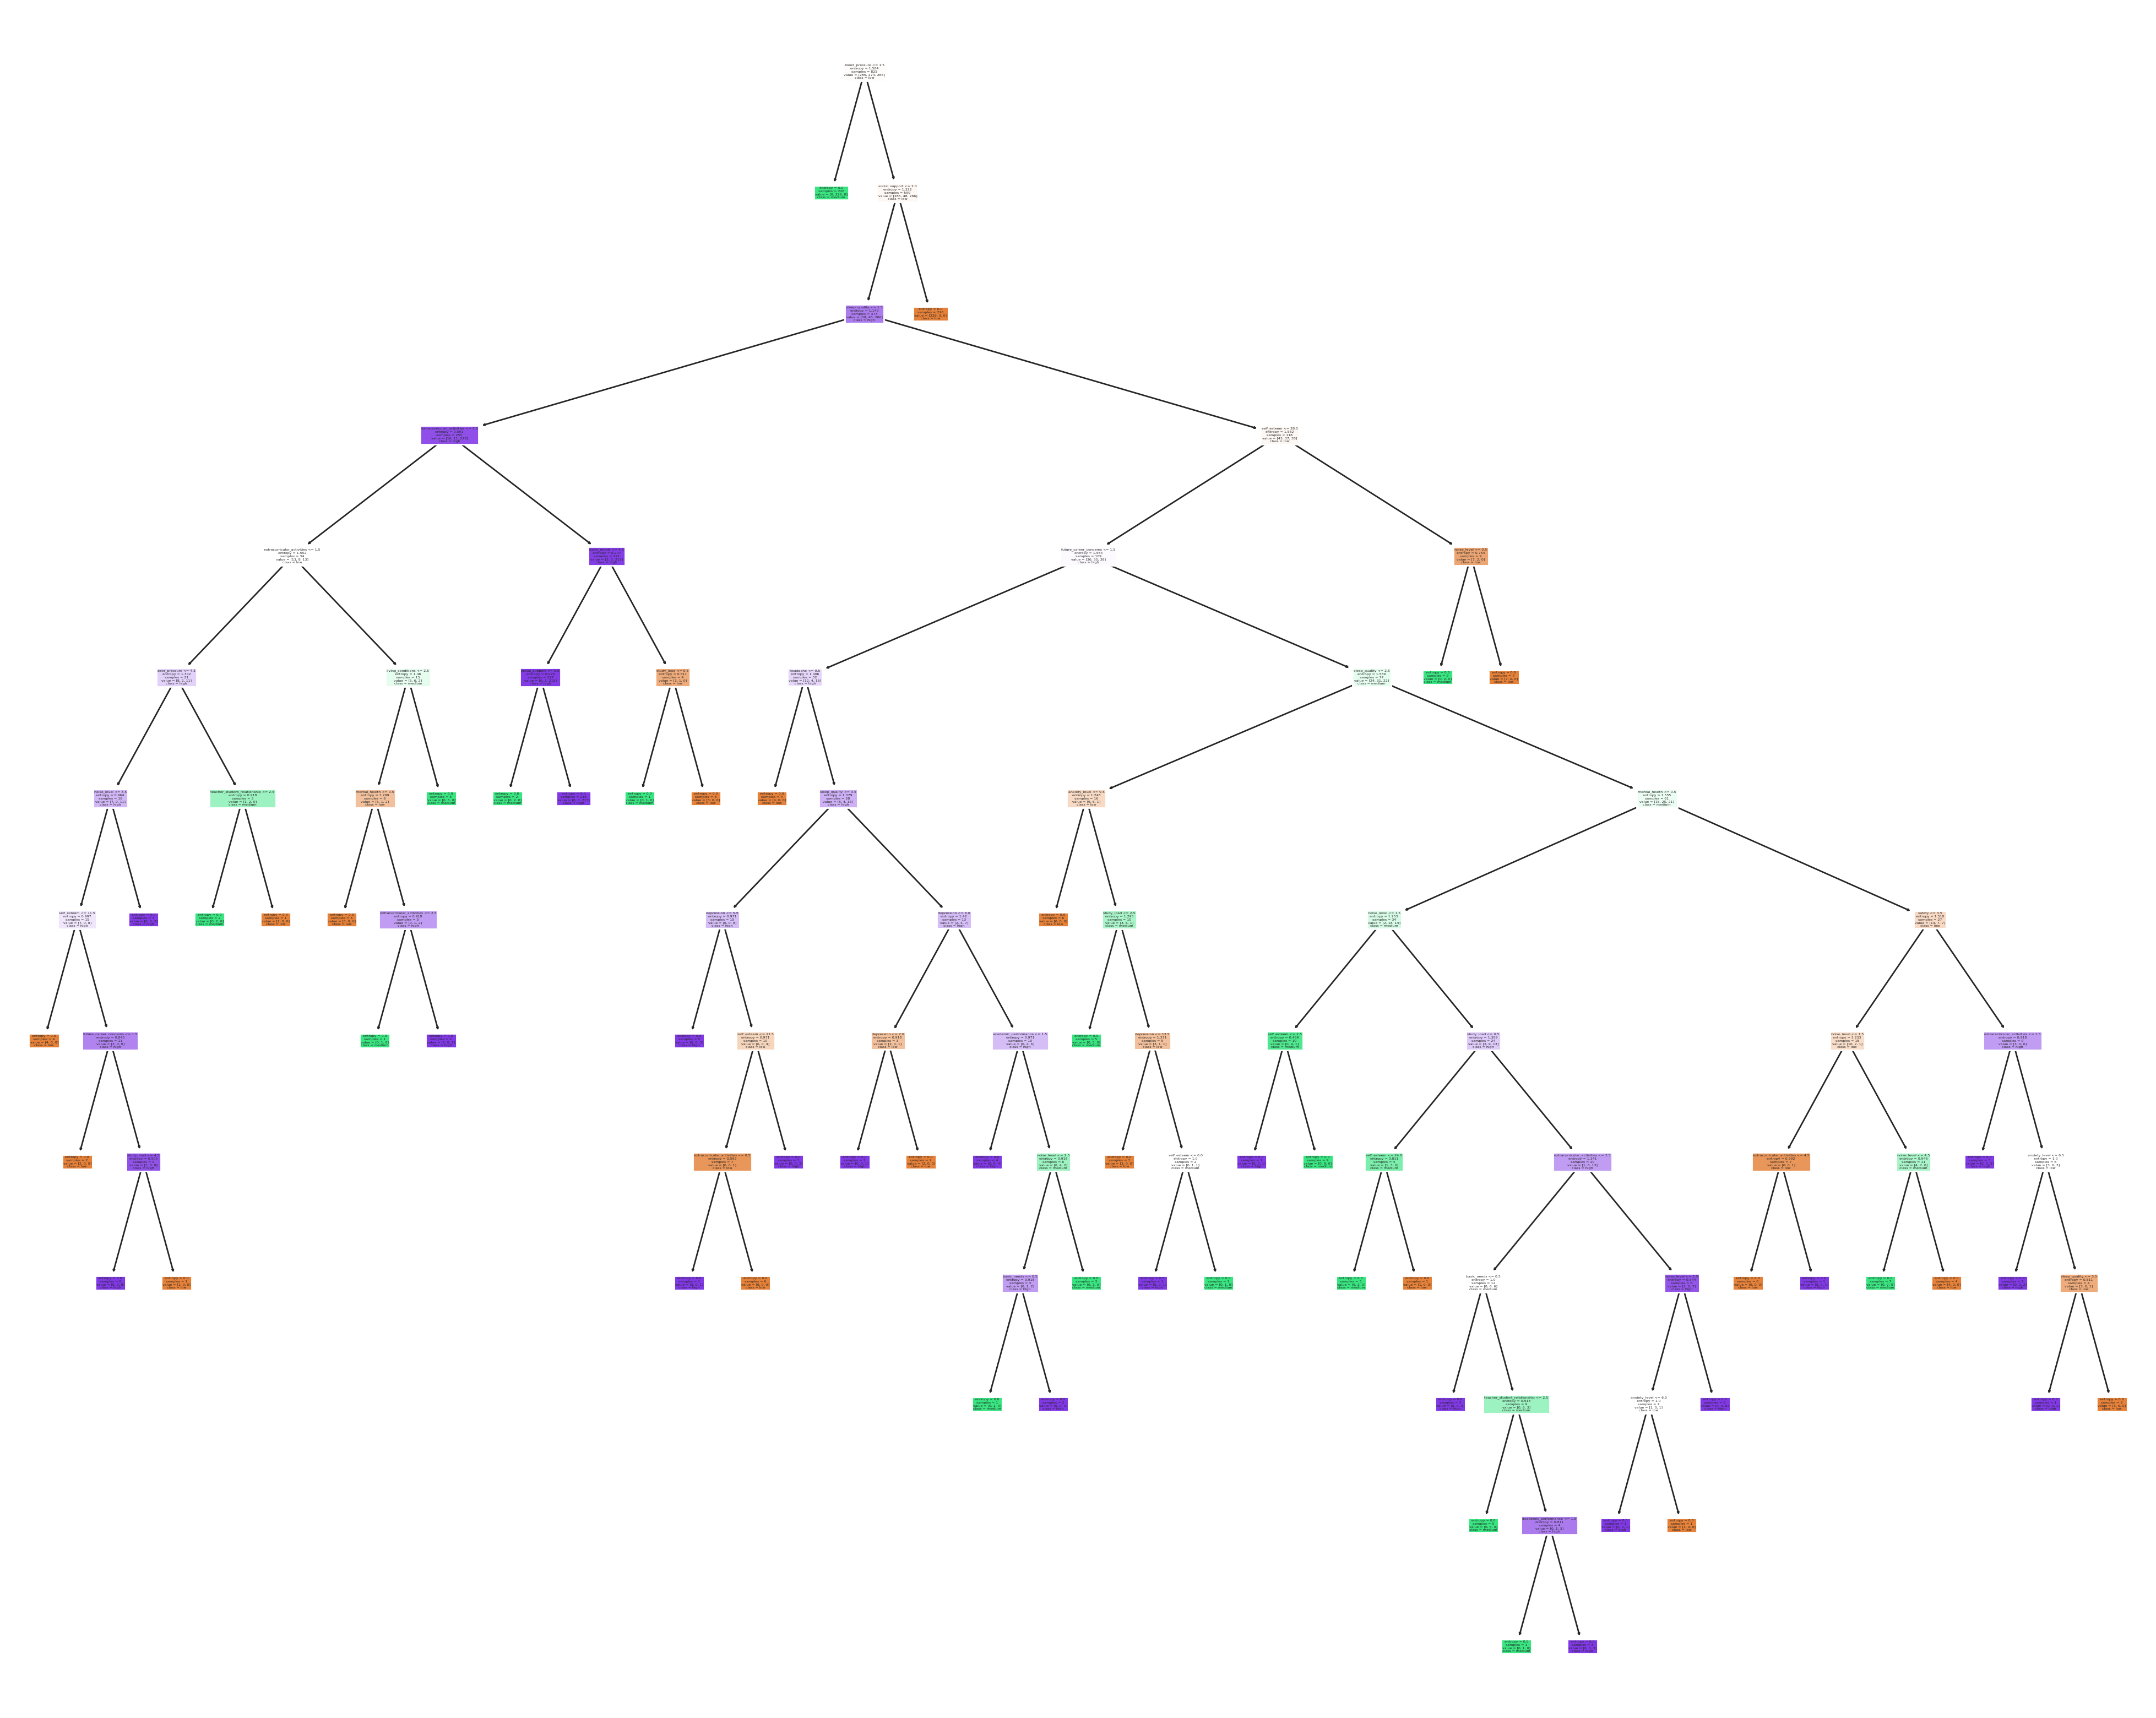

In [ ]:

fig = plt.figure(figsize = (25 , 20) , dpi = 200.0)

_ = tree.plot_tree(clf,
                   feature_names = ['anxiety_level','self_esteem','mental_health','depression','headache', 'blood_pressure','sleep_quality','breathing_problem',
            'noise_level',
            'living_conditions',
            'safety',
            'basic_needs',
            'academic_performance',
            'study_load',
            'teacher_student_relationship',
            'future_career_concerns',
            'social_support',
            'peer_pressure',
            'extracurricular_activities',
            'bullying'],
                   class_names = ['low', 'medium', 'high'],
                   filled = True)

In [ ]:
# Now, Let us test the accuracy of the decision tree model
# on the training data and on test data.

# predict() method predicts classes for test dataset
# accuracy_score() will take original class labels,  predicted class labels and
#  computes accuracy of the model.


# Let us first test the accuracy of the model on the training data itself.


from sklearn.metrics import accuracy_score

pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(Y_train, pred_train)

print('% of Accuracy on training data: ', accuracy_train * 100 )



# Let us test the accuracy of the model on the test data (or new data or unseen data).

pred_test = clf.predict(X_test)

accuracy_test = accuracy_score(Y_test, pred_test)

print('% of Accuracy on test data: ', accuracy_test * 100 )
report = classification_report(Y_test, pred_test)
print('Classification report\n',report)



% of Accuracy on training data:  100.0
% of Accuracy on test data:  90.18181818181819
Classification report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        88
           1       0.87      0.93      0.90        84
           2       0.95      0.89      0.92       103

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275



DECISION TREE CLASSIFIER

RANDOM FOREST REGRESSION

Mean Squared Error: 0.12917136363636364


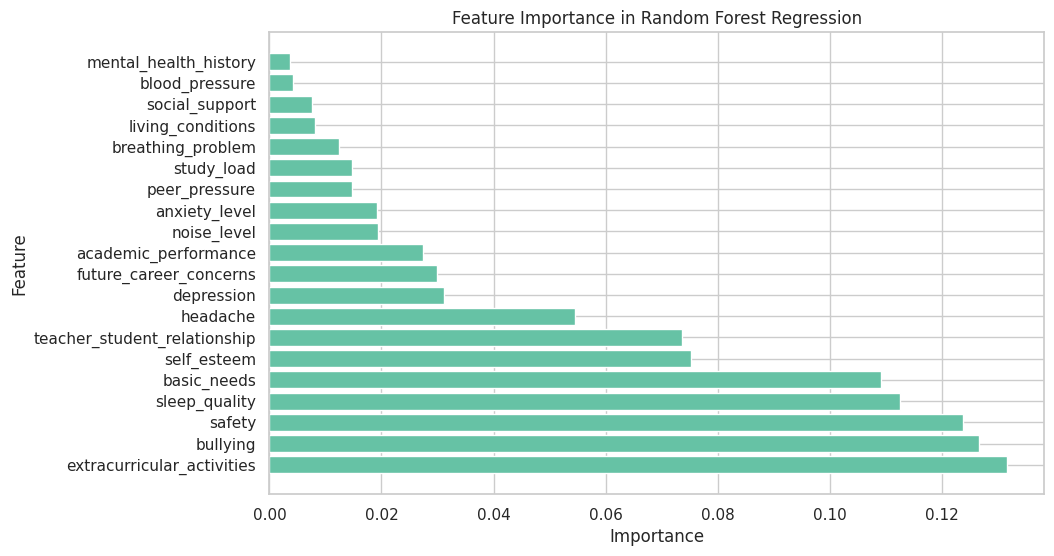

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a dataset in a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset
dataset_path = '/StressLevelDataset.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Define the features and target variable
features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
            'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs',
            'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
            'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

target = 'stress_level'  # Replace 'stress_parameter' with the actual target variable in your dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regression')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# ...

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.12917136363636364
Mean Absolute Error: 0.13186363636363635
R-squared: 0.8065327556862139


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/StressLevelDataset.csv')

# Assume your dataset has features and a target variable
X = data.drop('stress_level', axis=1)
y = data['stress_level']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('RANDOM FOREST CLASSIFIER')
print(f'Accuracy: {accuracy * 100:.2f}%')
print('% of Accuracy on test data: ', accuracy * 100 )
report = classification_report(y_test, y_pred)
print('Classification report\n',report)

RANDOM FOREST CLASSIFIER
Accuracy: 87.27%
% of Accuracy on test data:  87.27272727272727
Classification report
               precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



NAIVE BAYES CLASSIFIER

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Assuming you have a dataset in a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset
dataset_path = '/StressLevelDataset.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Define the features and target variable
features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
            'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs',
            'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
            'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

target = 'stress_level'  # Replace 'stress_category' with the actual target variable in your dataset

# Assuming you have a categorical target variable, encode it numerically
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('NAIVE BAYES CLASSIFIER')
print(f'Accuracy: {accuracy}')



print('% of Accuracy on test data: ', accuracy * 100 )
report = classification_report(y_test, y_pred)
print('Classification report\n',report)



NAIVE BAYES CLASSIFIER
Accuracy: 0.9
% of Accuracy on test data:  90.0
Classification report
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        76
           1       0.98      0.85      0.91        73
           2       0.81      0.96      0.88        71

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



Gradient Boosting Machines (GBM)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have a dataset in a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset
dataset_path = '/StressLevelDataset.csv'

# Load the dataset
df = pd.read_csv(dataset_path)

# Define the features and target variable
features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
            'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs',
            'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
            'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

target = 'stress_level'  # Replace 'stress_category' with the actual target variable in your dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create the Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test)
print('gradient boosting machine (GBM)')
# Print the classification report and accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))



gradient boosting machine (GBM)
Accuracy: 88.63636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        76
           1       0.88      0.90      0.89        73
           2       0.91      0.89      0.90        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



COMPARISON

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 880, number of used features: 20
[LightGBM] [Info] Start training from score -1.086190
[LightGBM] [Info] Start training from score -1.127433
[LightGBM] [Info] Start training from score -1.082828
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

<ipython-input-51-76436b900aae>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='viridis')


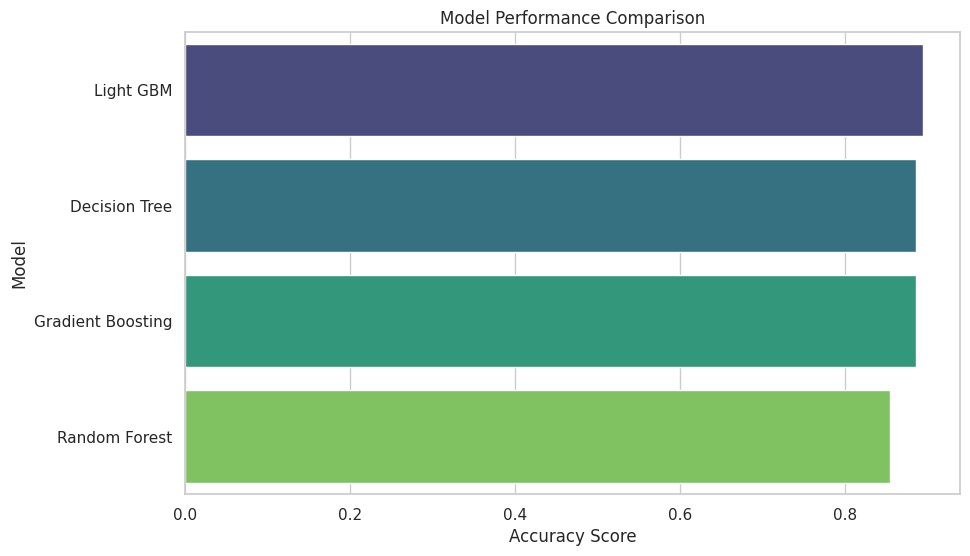

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
dataset_path = '/StressLevelDataset.csv'
df = pd.read_csv(dataset_path)

# Define features and target variable
features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure',
            'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs',
            'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns',
            'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

target = 'stress_level'  # Replace 'stress_category' with the actual target variable in your dataset

# Convert the target variable to integer labels for classification
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=31),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=55),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, random_state=42),
    'Light GBM': lgb.LGBMClassifier(n_estimators=100, learning_rate=0.01, max_depth=6, random_state=42)  # Adjust hyperparameters
}

# Train models and collect accuracy scores
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Ensure that y_test and y_pred have the same type
    if not all(isinstance(label, type(y_pred[0])) for label in y_test):
        y_test = y_test.astype(type(y_pred[0]))

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

# Create a DataFrame from the accuracy scores
results_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Plot the comparison graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.show()


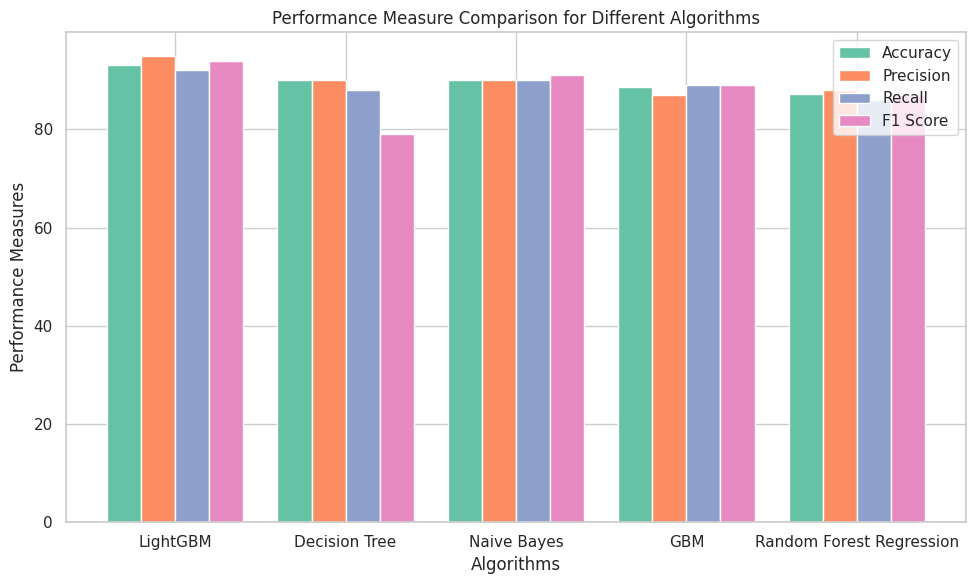

In [ ]:
import matplotlib.pyplot as plt

# Define the algorithms and their corresponding performance measures
algorithms = ['LightGBM', 'Decision Tree', 'Naive Bayes', 'GBM', 'Random Forest Regression']
accuracy = [93.09, 90.08, 90, 88.63, 87.27]
precision = [95, 90, 90, 87, 88]
recall = [92, 88, 90, 89, 86]
f1_score = [94, 79, 91, 89, 87]

# Set up the figure and axes
plt.figure(figsize=(10, 6))
index = range(len(algorithms))
bar_width = 0.2

# Plot bars for each performance measure
plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
plt.bar([i + 2 * bar_width for i in index], recall, bar_width, label='Recall')
plt.bar([i + 3 * bar_width for i in index], f1_score, bar_width, label='F1 Score')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Performance Measures')
plt.title('Performance Measure Comparison for Different Algorithms')
plt.xticks([i + 1.5 * bar_width for i in index], algorithms)
plt.legend()

# Save plot with DPI set to 1200
plt.tight_layout()
plt.savefig('performance_comparison.png', dpi=1200)
plt.show()
